In [55]:
# data manipulation imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ml imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [56]:
# read in data
train=pd.read_csv('/Users/srikarprayaga/Desktop/NW-Modeling-Assessment/TRAIN_SET_2021.csv')
test=pd.read_csv('/Users/srikarprayaga/Desktop/NW-Modeling-Assessment/TEST_SET_2021.csv')

## Data Cleaning and  Preparation 

In [57]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


Identify the number of null(NA) from every column 

In [58]:
# check number of null values per column
train.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 130
ADDRESS                              70
CITY                                236
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       308
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     183
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 254
VIOLATIONS_RAW                      165
RECORD_UPDATED                      119
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


Get a percentage of total number of value swhich are null

In [59]:
# perentage of null values per column
print(train.isnull().sum()/train.shape[0])
# print average of the null value percentages 
print(np.mean(train.isnull().sum()/train.shape[0])*100)

RESTAURANT_SERIAL_NUMBER            0.000000
RESTAURANT_PERMIT_NUMBER            0.000000
RESTAURANT_NAME                     0.004147
RESTAURANT_LOCATION                 0.012761
RESTAURANT_CATEGORY                 0.008295
ADDRESS                             0.004466
CITY                                0.015058
STATE                               0.013335
ZIP                                 0.003764
CURRENT_DEMERITS                    0.013782
CURRENT_GRADE                       0.019652
EMPLOYEE_COUNT                      0.005934
MEDIAN_EMPLOYEE_AGE                 0.002169
MEDIAN_EMPLOYEE_TENURE              0.018950
INSPECTION_TIME                     0.011676
INSPECTION_TYPE                     0.014101
INSPECTION_DEMERITS                 0.016206
VIOLATIONS_RAW                      0.010528
RECORD_UPDATED                      0.007593
LAT_LONG_RAW                        0.000957
FIRST_VIOLATION                     0.013526
SECOND_VIOLATION                    0.005423
THIRD_VIOL

Due to the null values being a very small percentage (<1%) it is feasible to remove them without affecting the outputs

In [60]:
# drop all null value since null values make up a very small percentage of the data (< 1%)
train.dropna(inplace=True)

In [61]:
# perentage of null values per column after dropping null values
print(train.isnull().sum()/train.shape[0])

RESTAURANT_SERIAL_NUMBER            0.0
RESTAURANT_PERMIT_NUMBER            0.0
RESTAURANT_NAME                     0.0
RESTAURANT_LOCATION                 0.0
RESTAURANT_CATEGORY                 0.0
ADDRESS                             0.0
CITY                                0.0
STATE                               0.0
ZIP                                 0.0
CURRENT_DEMERITS                    0.0
CURRENT_GRADE                       0.0
EMPLOYEE_COUNT                      0.0
MEDIAN_EMPLOYEE_AGE                 0.0
MEDIAN_EMPLOYEE_TENURE              0.0
INSPECTION_TIME                     0.0
INSPECTION_TYPE                     0.0
INSPECTION_DEMERITS                 0.0
VIOLATIONS_RAW                      0.0
RECORD_UPDATED                      0.0
LAT_LONG_RAW                        0.0
FIRST_VIOLATION                     0.0
SECOND_VIOLATION                    0.0
THIRD_VIOLATION                     0.0
FIRST_VIOLATION_TYPE                0.0
SECOND_VIOLATION_TYPE               0.0


Get the number of rows left after dropping the null values 

In [62]:
# shape of the data after dropping null values
train.shape

(12083, 28)

Prepare data by removing outliers and cast to appropriate data type 

In [63]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
5,DA1567561,PR0006724,Hotel Brendans Irish Pub,Orleans Hotel and Casino,Bar / Tavern,4500 W Tropicana Ave,Las Vegas,Nevada,89103-5420,3.0,...,9/11/2015 16:59,"(36.1027192, 115.201984)",206.0,211.0,215.0,Critical,Major,Major,7,0


Observe the datatypes of every column to undertand if datatype associated with every column is appropriate 

In [64]:
train.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                 float64
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

Check if the data in RESTAURANT_SERIAL_NUMBER is reasonable 

In [65]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['RESTAURANT_SERIAL_NUMBER'].value_counts())

DA1117536    1
DA0993891    1
DA1077317    1
DA1199744    1
DA0992421    1
DA1128310    1
DA0992234    1
DA0585729    1
DA1368810    1
DA1151603    1
DA1017324    1
DA1134999    1
DA0570734    1
DA0602475    1
DA1122563    1
DA0423290    1
DA0867604    1
DA0127318    1
DA1439822    1
DA0981465    1
DA0958384    1
DA0873131    1
DA1155477    1
DA0099324    1
DA0975249    1
DA1123424    1
DA1683797    1
DA0626734    1
DA1005056    1
DA0548173    1
DA0415293    1
DA1004491    1
DA1140273    1
DA0988719    1
DA0916454    1
DA0966116    1
DA1179329    1
DA1120305    1
DA1022565    1
DA0987569    1
DA0945220    1
DA0608945    1
DA0974008    1
DA1112546    1
DA0048637    1
DA0925920    1
DA1023631    1
DA0905361    1
DA0948511    1
DA0957163    1
DA0966540    1
DA0936188    1
DA0869780    1
DA0968527    1
DA0840946    1
DA1455181    1
DA0900443    1
DA0592904    1
DA1599261    1
DA0855425    1
DAORLA7BT    1
DA0135579    1
DA0985267    1
DA1157229    1
DA0374927    1
DA1017489    1
DA0988256 

Identified that almost all id numbers follow the form (AD....) 

In [66]:
# remove all rows from train in column RESTAURANT_SERIAL_NUMBER which dont match "\ADA\d{7}" (AD....) regex expresion 
train = train[train["RESTAURANT_SERIAL_NUMBER"].str.contains("\ADA\d{7}")]
train.shape

(11072, 28)

In [67]:
train["RESTAURANT_PERMIT_NUMBER"]

0        PR0004527
1        PR0024221
2        PR0019017
3        PR0001343
5        PR0006724
           ...    
15668    PR0002834
15669    PR0017832
15670    PR0000125
15671    PR0014816
15672    PR0003839
Name: RESTAURANT_PERMIT_NUMBER, Length: 11072, dtype: object

Check if the data in RESTAURANT_NAME is reasonable 

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['RESTAURANT_NAME'].value_counts())
train['RESTAURANT_NAME'].dtype

Robertos Taco Shop                                                       62
Dairy Queen                                                              20
PTS to Go                                                                17
Little Dumpling                                                          16
Capriottis Sandwich Shop                                                 16
Teriyaki Madness                                                         14
China a Go Go                                                            13
Popeyes Chicken & Biscuits                                               12
Natalie's Bake & Shark                                                   11
Angelinas Pizzeria                                                       11
Vegas Express Sushi                                                      11
Timbers Grill                                                            10
China a Go Go 5                                                          10
CAPRIOTTIS S

dtype('O')

Check if the data in RESTAURANT_LOCATION is reasonable 

In [69]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['RESTAURANT_LOCATION'].value_counts())
train['RESTAURANT_LOCATION'].dtype

MIRAGE HOTEL & CASINO                                 86
CAESARS PALACE HOTEL & CASINO                         80
ARIA HOTEL & CASINO                                   70
MGM GRAND HOTEL & CASINO                              70
PARIS HOTEL & CASINO                                  68
BELLAGIO HOTEL & CASINO                               67
HARRAHS LV HOTEL & CASINO                             62
FLAMINGO LV HOTEL & CASINO                            62
MANDALAY BAY HOTEL & CASINO                           60
COSMOPOLITAN RESORT & CASINO                          58
HARD ROCK HOTEL & CASINO                              55
Robertos Taco Shop                                    54
Rio Suites Hotel                                      50
Pizza Hut                                             43
Golden Nugget Las Vegas                               41
PLANET HOLLYWOOD RESORT AND CASINO                    39
VENETIAN HOTEL & CASINO                               38
TREASURE ISLAND HOTEL & CASINO 

dtype('O')

Check if the data in RESTAURANT_CATEGORY is reasonable 

In [70]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['RESTAURANT_CATEGORY'].value_counts())
train['RESTAURANT_CATEGORY'].dtype

Restaurant                     6473
Bar / Tavern                   1798
Snack Bar                       942
Special Kitchen                 836
Buffet                          166
Portable Unit                   137
Pantry                          112
Meat/Poultry/Seafood             94
Food Trucks / Mobile Vendor      70
Caterer                          52
Banquet Kitchen                  50
Kitchen Bakery                   42
Bakery Sales                     37
Garde Manger                     36
Vegetable Prep                   32
Produce Market                   26
Concessions                      24
Institutional Food Service       23
Confection                       23
Grocery Store Sampling           17
Portable Bar                     14
Elementary School Kitchen        14
Banquet Support                  11
Barbeque                         10
Childcare Kitchens               10
Gas Station                       8
Main Kitchen                      7
Gastropub                   

dtype('O')

Check if the data in ADDRESS is reasonable 

In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['ADDRESS'].value_counts())

3400 S Las Vegas Blvd                 104
3950 S Las Vegas Blvd                  98
3799 S Las Vegas Blvd                  96
3355 S Las Vegas Blvd                  92
3570 S Las Vegas Blvd                  83
3655 S Las Vegas Blvd                  77
3730 S Las Vegas Blvd                  70
3600 S Las Vegas Blvd                  67
3475 S Las Vegas Blvd                  66
3555 S Las Vegas Blvd                  63
3708 S Las Vegas Blvd                  62
3667 S Las Vegas Blvd                  62
4455 S Paradise Rd                     61
3700 W Flamingo Rd                     55
3325 S Las Vegas Blvd                  50
5757 Wayne Newton Blvd                 49
3200 S Las Vegas Blvd                  48
3790 S Las Vegas Blvd                  47
2901 S Las Vegas Blvd                  46
3900 S Las Vegas Blvd                  44
3645 S Las Vegas Blvd                  43
3770 S Las Vegas Blvd                  43
31900 Las Vegas Blvd                   41
129 E Fremont St                  

Check if the data in CITY is reasonable

In [72]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['CITY'].value_counts())

Las Vegas                8826
Henderson                1085
North Las Vegas           668
Laughlin                  138
Mesquite                  121
Boulder City               98
Primm                      75
Logandale                  10
Indian Springs              9
Saskatoon                   8
Overton                     6
Searchlight                 5
Blue Diamond                5
New York                    5
Moapa                       3
Sandy Valley                2
Jean                        2
Walla Walla                 1
HendeSON                    1
Deep Space Nine             1
Port of Spain               1
Truth or Consequences       1
Goodsprings                 1
Name: CITY, dtype: int64


Check if the data in STATE is reasonable

Convert misspelled state (Nevada) to correct name and remove random names (Star Trek)/ location which were not Nevada

In [73]:
# convert NeVaDa and Nevada? to Nevada in STATE column
train['STATE'] = train['STATE'].str.replace('NeVaDa', 'Nevada')
train['STATE'] = train['STATE'].str.replace('Nevada?', 'Nevada')
# drop row with STAR TREK in STATE column
train = train[train['STATE'] != 'Star Trek']
# drop row 'TT' in STATE column
train = train[train['STATE'] != 'TT']
# drop all rows in STATE which are not 'Nevada'
train = train[train['STATE'] == 'Nevada']

In [74]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['STATE'].value_counts())

Nevada    11054
Name: STATE, dtype: int64


Check if the data in ZIP is reasonable

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['ZIP'].value_counts())

89109         304
89109-8941    114
89130         110
89102         106
89109-8923    104
89101         100
89146         100
89119         100
89119-1005     98
89109-4319     95
89109-8924     83
89109-4345     83
89109-2612     82
89103          81
89030          77
89110          72
89109-8901     72
89109-1920     68
89104          68
89109-4303     67
89169-6574     67
89123          67
89109-8922     67
89031          64
89109-4312     62
89109-4331     62
89107          61
89052          58
89103-4043     55
89121          55
89084          54
89014          53
89111-5000     48
89147          48
89109-1933     47
89109-4338     47
89032          46
89109-4337     45
89109-1414     44
89119-1004     44
89101-5603     41
89019-7002     41
89029          40
89118          40
89149          39
89109-8916     38
89131          37
89114          37
89183-4013     36
89117          35
89109-8900     35
89109-4324     35
89108          35
89109-1287     34
89169          34
89052-2672

Check if the data in CURRENT_DEMERITS is reasonable

In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['CURRENT_DEMERITS'].value_counts())

0.0      2730
3.0      2272
8.0      1791
6.0      1638
9.0      1299
5.0       547
10.0      328
7.0        90
4.0        48
19.0       42
1.0        38
20.0       31
2.0        25
14.0       22
11.0       12
17.0       11
27.0       10
32.0       10
12.0       10
22.0        9
30.0        8
46.0        7
18.0        6
31.0        6
100.0       6
16.0        6
25.0        6
23.0        5
51.0        5
42.0        5
13.0        5
26.0        4
24.0        3
28.0        3
43.0        3
35.0        3
21.0        2
15.0        2
39.0        2
88.0        1
48.0        1
89.0        1
37.0        1
Name: CURRENT_DEMERITS, dtype: int64


Plot CURRENT_DEMERITS to visually identify outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CURRENT_DEMERITS', ylabel='Density'>

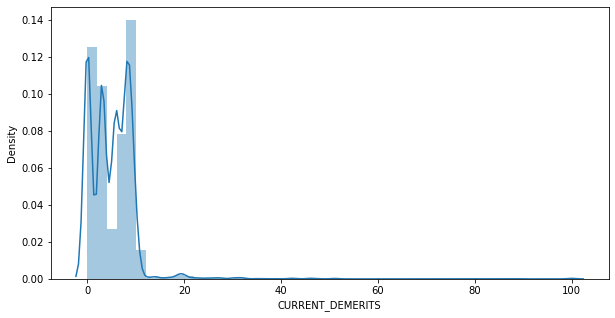

In [79]:
# plot  CURRENT_DEMERITS column to find outliers 
plt.figure(figsize=(10,5))
sns.distplot(train['CURRENT_DEMERITS'])

Remove the outliers using the 3 sigma rule. If the absolute value (|value-average|) is more than 3 times the standard deviation of our values, then we can consider the value as an outlier or anomaly

In [80]:
# remove the outliers from CURRENT_DEMERITS column using 3 sigma rule of removing outliers
train = train[np.abs(train['CURRENT_DEMERITS'] - train['CURRENT_DEMERITS'].mean()) <= (3*train['CURRENT_DEMERITS'].std())]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['CURRENT_DEMERITS'].value_counts())

0.0     2730
3.0     2272
8.0     1791
6.0     1638
9.0     1299
5.0      547
10.0     328
7.0       90
4.0       48
19.0      42
1.0       38
20.0      31
2.0       25
14.0      22
11.0      12
17.0      11
12.0      10
18.0       6
16.0       6
13.0       5
15.0       2
Name: CURRENT_DEMERITS, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CURRENT_DEMERITS', ylabel='Density'>

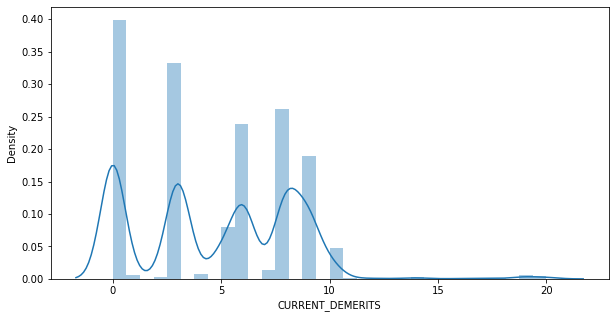

In [81]:
# plot  CURRENT_DEMERITS column to find outliers 
plt.figure(figsize=(10,5))
sns.distplot(train['CURRENT_DEMERITS'])

Check if the data in CURRENT_GRADE is reasonable

In [82]:

# convert to correct datatype and drop rows in  CURRENT_GRADE which include '.\<><1@#&|', 'VPN', 'A+','K','7'
train['CURRENT_GRADE'] = train['CURRENT_GRADE'].astype('category')
train = train[~train['CURRENT_GRADE'].isin(['.\<><1@#&|','VPN', 'A+', 'K', '7'])]
# Convert all rows in CURRENT_GRADE with 'O','N' to 'X'
train['CURRENT_GRADE'] = train['CURRENT_GRADE'].replace(['O','N'], 'X')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['CURRENT_GRADE'].value_counts()) 

A             10769
B               128
X                51
C                 2
K                 0
A+                0
.\<><1@#&|        0
Name: CURRENT_GRADE, dtype: int64


Check if the data in EMPLOYEE_COUNT is reasonable

In [84]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['EMPLOYEE_COUNT'].value_counts()) 

3.0     1504
14.0     449
11.0     446
13.0     443
15.0     425
12.0     422
18.0     422
16.0     416
17.0     409
10.0     387
19.0     382
8.0      375
9.0      362
21.0     353
22.0     341
20.0     325
7.0      314
23.0     308
6.0      305
5.0      299
24.0     292
25.0     254
26.0     248
4.0      246
27.0     192
29.0     160
28.0     151
30.0     132
31.0     113
33.0      90
32.0      88
34.0      78
35.0      50
37.0      29
38.0      28
39.0      23
36.0      22
42.0      13
40.0      12
41.0      12
43.0      11
44.0       6
47.0       4
52.0       2
46.0       2
45.0       2
48.0       1
Name: EMPLOYEE_COUNT, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMPLOYEE_COUNT', ylabel='Density'>

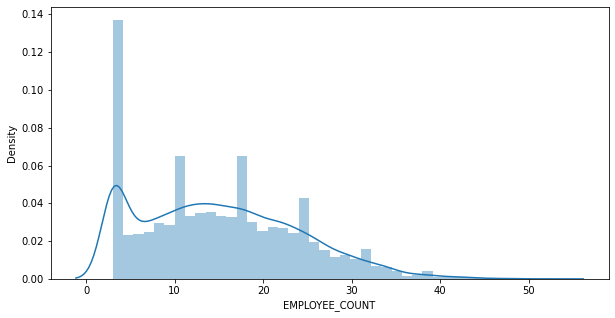

In [85]:
#plot the distribution of EMPLOYEE_COUNT before outlier removal 
plt.figure(figsize=(10,5))
sns.distplot(train['EMPLOYEE_COUNT'])

In [86]:
# remove outliers from EMPLOYEE_COUNT column using 3 sigma rule of removing outliers and remove rows with '<0'
train = train[np.abs(train['EMPLOYEE_COUNT'] - train['EMPLOYEE_COUNT'].mean()) <= (3*train['EMPLOYEE_COUNT'].std())]
train = train[train['EMPLOYEE_COUNT'] > 0]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['EMPLOYEE_COUNT'].value_counts()) 

3.0     1504
14.0     449
11.0     446
13.0     443
15.0     425
18.0     422
12.0     422
16.0     416
17.0     409
10.0     387
19.0     382
8.0      375
9.0      362
21.0     353
22.0     341
20.0     325
7.0      314
23.0     308
6.0      305
5.0      299
24.0     292
25.0     254
26.0     248
4.0      246
27.0     192
29.0     160
28.0     151
30.0     132
31.0     113
33.0      90
32.0      88
34.0      78
35.0      50
37.0      29
38.0      28
39.0      23
36.0      22
40.0      12
41.0      12
Name: EMPLOYEE_COUNT, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMPLOYEE_COUNT', ylabel='Density'>

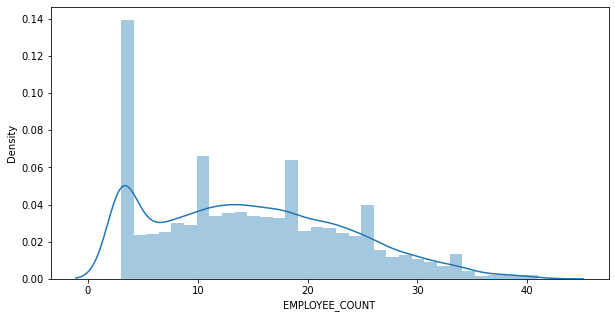

In [87]:
#plot the distribution of EMPLOYEE_COUNT after outlier removal 
plt.figure(figsize=(10,5))
sns.distplot(train['EMPLOYEE_COUNT'])


Check if the data in MEDIAN_EMPLOYEE_TENURE is reasonable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDIAN_EMPLOYEE_TENURE', ylabel='Density'>

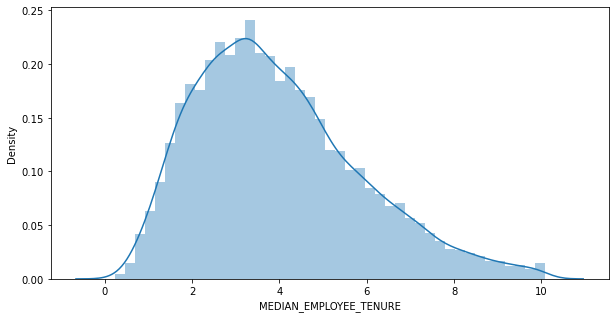

In [90]:
# plot the distribution of MEDIAN_EMPLOYEE_TENURE before outlier removal
plt.figure(figsize=(10,5))
sns.distplot(train['MEDIAN_EMPLOYEE_TENURE'])

In [91]:
# remove outliers in MEDIAN_EMPLOYEE_TENURE column using 3 sigma rule of removing outliers and remove rows with '<0'
train = train[np.abs(train['MEDIAN_EMPLOYEE_TENURE'] - train['MEDIAN_EMPLOYEE_TENURE'].mean()) <= (3*train['MEDIAN_EMPLOYEE_TENURE'].std())]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['MEDIAN_EMPLOYEE_TENURE'].value_counts()) 



4.367572    1
4.783380    1
3.773997    1
3.219497    1
5.711369    1
7.074168    1
4.345030    1
3.086392    1
8.568739    1
4.028788    1
3.004038    1
5.525016    1
2.116564    1
6.676649    1
2.059123    1
8.802951    1
4.169568    1
2.237687    1
6.350708    1
3.418409    1
5.339832    1
5.102990    1
6.188526    1
2.199910    1
3.231582    1
1.891246    1
2.849248    1
3.496288    1
3.983683    1
2.924139    1
3.903770    1
4.498726    1
2.659757    1
3.035228    1
2.196339    1
3.693776    1
3.972572    1
1.461422    1
2.771422    1
3.069714    1
4.298456    1
6.093336    1
6.421145    1
5.290834    1
3.353430    1
2.435557    1
2.404792    1
3.712794    1
4.187754    1
2.559584    1
2.705815    1
6.287075    1
2.051959    1
4.538855    1
2.042836    1
6.892430    1
3.023021    1
2.045144    1
3.189611    1
1.420520    1
5.034675    1
3.238173    1
4.821780    1
7.943990    1
3.178624    1
2.751880    1
7.744378    1
2.877330    1
4.792751    1
1.634269    1
4.211644    1
1.9695

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDIAN_EMPLOYEE_TENURE', ylabel='Density'>

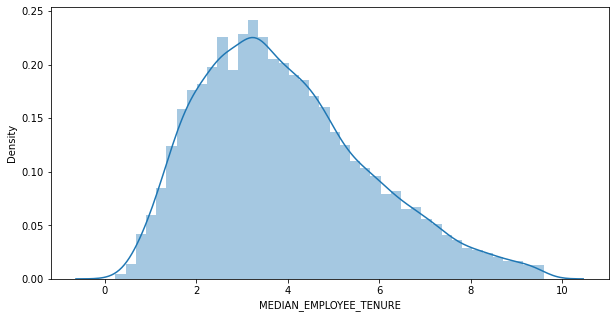

In [92]:
# plot the distribution of MEDIAN_EMPLOYEE_TENURE after outlier removal
plt.figure(figsize=(10,5))
sns.distplot(train['MEDIAN_EMPLOYEE_TENURE'])

Check if the data in INSPECTION_TYPE is reasonable

In [93]:
# remove Routine Non-Inspection from INSPECTION_TYPE column
train = train[~train['INSPECTION_TYPE'].isin(['Routine Non-Inspection'])]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['INSPECTION_TYPE'].value_counts()) 

Routine Inspection    10096
Re-inspection           649
Name: INSPECTION_TYPE, dtype: int64


In [94]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['INSPECTION_DEMERITS'].value_counts()) 


10    1475
9     1271
7      885
8      770
5      722
20     712
19     691
6      610
17     514
3      456
14     344
18     288
16     267
15     223
4      144
12     105
13     101
28     101
30      98
11      71
25      68
31      68
27      57
29      56
36      55
40      49
33      48
22      47
39      46
26      46
32      44
24      40
38      40
37      36
34      34
23      34
35      33
21      22
50      11
47       8
44       7
49       6
48       5
0        5
53       4
46       4
55       3
41       3
45       2
42       2
59       2
43       2
51       2
56       1
58       1
86       1
60       1
77       1
54       1
61       1
52       1
Name: INSPECTION_DEMERITS, dtype: int64


Check if the data in FIRST_VIOLATION is reasonable

In [95]:
# convert FIRST_VIOLATION to object datatype
train['FIRST_VIOLATION'] = train['FIRST_VIOLATION'].astype('object')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['FIRST_VIOLATION'].value_counts()) 

202.0    1776
211.0     998
209.0     935
214.0     903
206.0     613
212.0     577
14.0      543
13.0      535
213.0     352
204.0     314
215.0     308
208.0     278
4.0       274
201.0     160
19.0      134
12.0      131
10.0      112
2.0       108
22.0       97
31.0       94
218.0      94
225.0      93
27.0       85
216.0      83
28.0       70
210.0      66
228.0      61
25.0       60
18.0       58
217.0      57
203.0      57
222.0      50
207.0      48
20.0       48
205.0      43
30.0       42
226.0      42
7.0        40
9.0        39
229.0      39
227.0      38
223.0      37
23.0       35
5.0        33
24.0       29
35.0       19
230.0      19
221.0      14
21.0       14
1.0        13
36.0       12
34.0       10
220.0       9
16.0        8
224.0       8
32.0        5
231.0       4
8.0         4
219.0       4
26.0        3
33.0        3
29.0        2
37.0        2
17.0        1
3.0         1
301.0       1
Name: FIRST_VIOLATION, dtype: int64


Check if the data in SECOND_VIOLATION is reasonable

In [96]:
# convert SECOND_VIOLATION to object datatype
train['SECOND_VIOLATION'] = train['SECOND_VIOLATION'].astype('object')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['SECOND_VIOLATION'].value_counts()) 


211.0    932
214.0    855
209.0    850
215.0    816
212.0    573
213.0    528
14.0     362
230.0    358
31.0     339
206.0    307
225.0    278
218.0    268
208.0    246
228.0    232
216.0    231
229.0    228
217.0    214
27.0     201
13.0     194
19.0     181
227.0    169
222.0    164
204.0    158
36.0     153
28.0     147
223.0    147
22.0     147
25.0     125
20.0     108
35.0     104
226.0    100
30.0      87
23.0      67
232.0     64
24.0      57
231.0     56
12.0      54
18.0      52
221.0     50
37.0      49
203.0     47
207.0     41
34.0      40
219.0     37
202.0     34
224.0     24
205.0     24
32.0      23
220.0     22
210.0     22
9.0       20
16.0      20
4.0       19
38.0      16
7.0       14
112.0     14
21.0      11
33.0      11
5.0       11
26.0       8
29.0       7
113.0      5
17.0       4
233.0      4
2.0        4
111.0      3
64.0       3
15.0       2
302.0      2
10.0       1
61.0       1
Name: SECOND_VIOLATION, dtype: int64


Check if the data in THIRD_VIOLATION is reasonable

In [97]:
# convert THIRD_VIOLATION to object datatype
train['THIRD_VIOLATION'] = train['THIRD_VIOLATION'].astype('object')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['THIRD_VIOLATION'].value_counts()) 


215.0    845
233.0    829
230.0    654
211.0    628
212.0    447
213.0    441
229.0    440
217.0    394
225.0    374
31.0     370
214.0    369
228.0    369
216.0    341
36.0     305
209.0    302
218.0    292
227.0    291
37.0     244
35.0     208
222.0    176
232.0    167
27.0     166
231.0    162
226.0    155
14.0     133
28.0     120
112.0    109
114.0    104
19.0      97
22.0      92
30.0      81
208.0     75
223.0     74
25.0      71
34.0      63
113.0     59
64.0      55
38.0      50
206.0     48
24.0      48
13.0      46
23.0      42
221.0     41
220.0     40
20.0      39
224.0     37
18.0      28
32.0      27
219.0     24
33.0      22
29.0      16
12.0      14
210.0     13
302.0     13
21.0      12
111.0     12
234.0     11
26.0       8
16.0       7
204.0      6
203.0      6
207.0      5
9.0        4
4.0        4
205.0      4
15.0       2
305.0      2
5.0        2
310.0      2
39.0       1
40.0       1
61.0       1
62.0       1
306.0      1
301.0      1
303.0      1
304.0      1

Check if the data in FIRST_VIOLATION_TYPE is reasonable

In [99]:
# remove not sure from FIRST_VIOLATION_TYPE column and convert Imminent Health Hazard to Critical
train = train[~train['FIRST_VIOLATION_TYPE'].isin(['Not Sure'])]
train['FIRST_VIOLATION_TYPE'] = train['FIRST_VIOLATION_TYPE'].replace(['Imminent Health Hazard'], 'Critical')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['FIRST_VIOLATION_TYPE'].value_counts()) 


Major        4967
Critical     4585
Non-Major    1193
Name: FIRST_VIOLATION_TYPE, dtype: int64


Check if the data in SECOND_VIOLATION_TYPE is reasonable

In [101]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['SECOND_VIOLATION_TYPE'].value_counts()) 
train['SECOND_VIOLATION_TYPE'].dtype

Major                     5483
Non-Major                 3436
Critical                  1823
Imminent Health Hazard       2
Supercritical                1
Name: SECOND_VIOLATION_TYPE, dtype: int64


dtype('O')

In [198]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['THIRD_VIOLATION_TYPE'].value_counts()) 

Non-Major                 5552
Major                     4696
Critical                   558
Imminent Health Hazard      21
Name: THIRD_VIOLATION_TYPE, dtype: int64


In [202]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['NUMBER_OF_VIOLATIONS'].value_counts()) 

3     2784
4     2567
5     1378
6     1163
7      765
8      635
9      410
10     308
11     215
12     190
13     128
14      93
15      67
16      47
17      23
18      20
19       7
20       6
23       5
25       4
22       3
24       3
42       1
28       1
30       1
21       1
Name: NUMBER_OF_VIOLATIONS, dtype: int64


In [201]:
# remove -3 and 7 from NEXT_INSPECTION_GRADE_C_OR_BELOW column
train = train[~train['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(['-3','7'])]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts()) 



0    9111
1    1714
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: int64


## Data Exploration and Transformation

In [102]:
train.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

In [104]:
train.shape

(10745, 28)

In [103]:
# test and train split of data
X_train, X_test, y_train, y_test = train_test_split(train.drop(['NEXT_INSPECTION_GRADE_C_OR_BELOW'], axis=1), train['NEXT_INSPECTION_GRADE_C_OR_BELOW'], test_size=0.2, random_state=42)